In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
# import plotly.express as px 

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import (accuracy_score, 
                            confusion_matrix, 
                            classification_report,
                            f1_score,
                            plot_confusion_matrix,
                            precision_recall_curve,
                            precision_score,
                            recall_score,
                            roc_auc_score,
                            plot_roc_curve)

### Reading in data 

In [2]:
mass = pd.read_csv('../data/mass_mobile.csv')
mass.head(2)

,Unnamed: 0,id,country,ccode,region,protestnumber,protesterviolence,location,protesteridentity,sources,...,social_restrictions,start_date,end_date,target,notes_clean,neg,neu,pos,compound,protest_duration
0,0,201990001,Canada,20,North America,1,0.0,national,unspecified,1. great canadian train journeys into history;...,...,0,1990-01-15,1990-01-15,"[0, 0, 0, 0, 1, 0, 0]",canada s railway passenger system was finally ...,0.087,0.913,0.0,-0.8176,1
1,1,201990002,Canada,20,North America,2,0.0,"Montreal, Quebec",unspecified,1. autonomy s cry revived in quebec the new yo...,...,0,1990-06-25,1990-06-25,"[0, 0, 0, 0, 1, 0, 0]",protestors were only identified as young peopl...,0.000,1.000,0.0,0.0000,1


### Creating `mass_no_country` DataFrame

In [3]:
mass.drop(columns=['Unnamed: 0'], inplace=True)

In [4]:
mass_no_country = mass.copy()

In [5]:
mass_no_country = mass_no_country.drop(columns=[ 'country_Afghanistan',
 'country_Albania',
 'country_Algeria',
 'country_Angola',
 'country_Argentina',
 'country_Armenia',
 'country_Austria',
 'country_Azerbaijan',
 'country_Bahrain',
 'country_Bangladesh',
 'country_Belarus',
 'country_Belgium',
 'country_Benin',
 'country_Bolivia',
 'country_Bosnia',
 'country_Botswana',
 'country_Brazil',
 'country_Bulgaria',
 'country_Burkina Faso',
 'country_Burundi',
 'country_Cambodia',
 'country_Cameroon',
 'country_Canada',
 'country_Cape Verde',
 'country_Central African Republic',
 'country_Chad',
 'country_Chile',
 'country_China',
 'country_Colombia',
 'country_Comoros',
 'country_Congo Brazzaville',
 'country_Congo Kinshasa',
 'country_Costa Rica',
 'country_Croatia',
 'country_Cuba',
 'country_Cyprus',
 'country_Czech Republic',
 'country_Czechoslovakia',
 'country_Denmark',
 'country_Djibouti',
 'country_Dominican Republic',
 'country_Ecuador',
 'country_Egypt',
 'country_El Salvador',
 'country_Equatorial Guinea',
 'country_Eritrea',
 'country_Estonia',
 'country_Ethiopia',
 'country_Finland',
 'country_France',
 'country_Gabon',
 'country_Gambia',
 'country_Georgia',
 'country_Germany',
 'country_Germany East',
 'country_Germany West',
 'country_Ghana',
 'country_Greece',
 'country_Guatemala',
 'country_Guinea',
 'country_Guinea-Bissau',
 'country_Guyana',
 'country_Haiti',
 'country_Honduras',
 'country_Hungary',
 'country_India',
 'country_Indonesia',
 'country_Iran',
 'country_Iraq',
 'country_Ireland',
 'country_Italy',
 'country_Ivory Coast',
 'country_Jamaica',
 'country_Japan',
 'country_Jordan',
 'country_Kazakhstan',
 'country_Kenya',
 'country_Kosovo',
 'country_Kuwait',
 'country_Kyrgyzstan',
 'country_Laos',
 'country_Latvia',
 'country_Lebanon',
 'country_Lesotho',
 'country_Liberia',
 'country_Libya',
 'country_Lithuania',
 'country_Luxembourg',
 'country_Macedonia',
 'country_Madagascar',
 'country_Malawi',
 'country_Malaysia',
 'country_Mali',
 'country_Mauritania',
 'country_Mauritius',
 'country_Mexico',
 'country_Moldova',
 'country_Mongolia',
 'country_Montenegro',
 'country_Morocco',
 'country_Mozambique',
 'country_Myanmar',
 'country_Namibia',
 'country_Nepal',
 'country_Netherlands',
 'country_Nicaragua',
 'country_Niger',
 'country_Nigeria',
 'country_North Korea',
 'country_Norway',
 'country_Oman',
 'country_Pakistan',
 'country_Panama',
 'country_Papua New Guinea',
 'country_Paraguay',
 'country_Peru',
 'country_Philippines',
 'country_Poland',
 'country_Portugal',
 'country_Qatar',
 'country_Romania',
 'country_Russia',
 'country_Rwanda',
 'country_Saudi Arabia',
 'country_Senegal',
 'country_Serbia',
 'country_Serbia and Montenegro',
 'country_Sierra Leone',
 'country_Singapore',
 'country_Slovak Republic',
 'country_Slovenia',
 'country_Somalia',
 'country_South Africa',
 'country_South Korea',
 'country_South Sudan',
 'country_Spain',
 'country_Sri Lanka',
 'country_Sudan',
 'country_Suriname',
 'country_Swaziland',
 'country_Sweden',
 'country_Switzerland',
 'country_Syria',
 'country_Taiwan',
 'country_Tajikistan',
 'country_Tanzania',
 'country_Thailand',
 'country_Timor Leste',
 'country_Togo',
 'country_Tunisia',
 'country_Turkey',
 'country_Turkmenistan',
 'country_USSR',
 'country_Uganda',
 'country_Ukraine',
 'country_United Arab Emirate',
 'country_United Kingdom',
 'country_Uruguay',
 'country_Uzbekistan',
 'country_Venezuela',
 'country_Vietnam',
 'country_Yemen',
 'country_Yugoslavia',
 'country_Zambia',
 'country_Zimbabwe' ])

### Adding `violent_response` column 

In [6]:
mass_no_country['violent_response'] = 0 
mass_no_country.loc[mass_no_country['beatings'] == 1, 'violent_response'] = 1
mass_no_country.loc[mass_no_country['shootings'] == 1, 'violent_response'] = 1
mass_no_country.loc[mass_no_country['killings'] == 1, 'violent_response'] = 1

In [7]:
mass_no_country['violent_count'] = mass_no_country['beatings'] + mass_no_country['shootings'] + mass_no_country['killings']

In [8]:
# mass_no_country.drop(columns=['beatings', 'killings', 'shootings'], inplace=True)

In [9]:
mass_no_country.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15179 entries, 0 to 15178
Data columns (total 71 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     15179 non-null  int64  
 1   country                                15179 non-null  object 
 2   ccode                                  15179 non-null  int64  
 3   region                                 15179 non-null  object 
 4   protestnumber                          15179 non-null  int64  
 5   protesterviolence                      15179 non-null  float64
 6   location                               15158 non-null  object 
 7   protesteridentity                      15179 non-null  object 
 8   sources                                15175 non-null  object 
 9   notes                                  15179 non-null  object 
 10  protester_id_type                      15179 non-null  object 
 11  pa

### Saving CSV 

Below, saving again `mass_no_country` as `mass_for_modeling` with the following columns: 
+ `violent_response` added 
+ all countries dropped 
+ NO prediction columns 

In [10]:
# mass_no_country.to_csv('../data/mass_for_modeling.csv')

In [11]:
def evaluate_model(y_true, y_preds):
    
    f1 = f1_score(y_true, y_preds)
    
    precision = precision_score(y_true, y_preds)
    
    recall = recall_score(y_true, y_preds)
    
    accuracy = accuracy_score(y_true, y_preds)

    return f1, precision, recall, accuracy

_Note: I am not yet using the `response_prediction_columns` function and have commented it out from `state_response_predictor` function._

In [12]:
def response_prediction_columns(model, df, features):
    
    ss = StandardScaler()
    
    X = features
    X_sc = ss.fit_transform(X)
    
    predicted_column = model.predict(X_sc)
    probability_column = model.predict_proba(X_sc)[:,1]
    
    return predicted_column, probability_column

In [13]:
def state_response_predictor(df, features, target, model, output_flag=False):
    
    X = features 
    y = df[target]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

    ss = StandardScaler()

    X_train_sc = ss.fit_transform(X_train)
    X_test_sc = ss.transform(X_test)
    
    model.fit(X_train_sc, y_train)
    
    y_preds_train = model.predict(X_train_sc)
    y_preds_test = model.predict(X_test_sc)
    
    predicted_probs = model.predict_proba(X_test_sc)

    f1_score_train, precision_train, recall_train, accuracy_train = evaluate_model(y_train, y_preds_train)
    f1_score_test, precision_test, recall_test, accuracy_test = evaluate_model(y_test, y_preds_test)
    
    roc_auc = roc_auc_score(y_test, predicted_probs[:,1])
    
#     predicted_column, probability_column = response_prediction_columns(model, df, features)

    if output_flag: 

        # confusion_matrix 
        plot_confusion_matrix(model, X_test_sc, y_test, cmap='Blues', display_labels=[f'Not {target}', f'{target}'])

        # ROC/AUC 
        plot_roc_curve(model, X_test_sc, y_test)
        plt.title(f'{target} ' + 'ROC Curve')

    #     print(f'{target}: F1_score for train set = {f1_score_train}')
    #     print(f'{target}: F1_score for test set = {f1_score_test}')
    #     print(f'{target}: Precision for train set = {precision_train}')
    #     print(f'{target}: Precision for test set = {precision_test}')
    #     print(f'{target}: Recall for train set = {recall_train}')
    #     print(f'{target}: Recall for test set = {recall_test}')
    #     print(f'{target}: Accuracy for train set = {accuracy_train}')
    #     print(f'{target}: Accuracy for test set = {accuracy_test}')    
    #     print(f'{target}: ROC/AUC = {roc_auc}')

    return (X_train, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, 
            recall_train, recall_test, accuracy_train, accuracy_test)

### Identifying `features` to use in Logistic Regressions

In [14]:
features = mass_no_country.drop(columns=['id', 'country', 'ccode', 'region', 'location','protesteridentity', 'sources',
           'notes', 'protester_id_type', 'protest_size_category', 'start_date', 'notes_clean', 'neg', 'neu', 'pos', 'compound',
           'end_date', 'target', 'arrests', 'accomodation', 'beatings', 'crowddispersal', 'ignore', 'killings', 'shootings', 
           'partipants_number','pop_male', 'pop_female', 'violent_response', 'violent_count', 'protest_duration'])

### Running `state_response_predictor` function on each target using hyperparameters identified from GridSearch so that I can use the model to find coefficients and identify import features.

#### **_1. Arrests_**

In [15]:
# instantiating logistic regression
logreg_arr = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')

# once model is run, logreg_arr has been fit and will retain fit model qualities 
X_train_arr, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'arrests', logreg_arr)

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
arr_coef = pd.DataFrame(list(zip(X_train_arr.columns, logreg_arr.coef_[0])), columns=['feature', 'coef'])
arr_coef.sort_values(by='coef')

In [ ]:
feature_importances = list(zip(X_train_arr.columns, logreg_arr.coef_[0]))

sorted_coeff = sorted(feature_importances, key = lambda x : x[1], reverse=True)    # SORT VALUES 

closest_to_label_1 = sorted(sorted_coeff[:5], key = lambda x : x[1])

closest_to_label_0 = sorted_coeff[-5:]

In [ ]:
feature_importances[1][1]

In [ ]:
feature = feature_importances[i][0]
coeff = features_importances[i][1]

In [ ]:
closest_to_label_1

In [ ]:
closest_to_label_0

In [ ]:
label_0_words = [x[0] for x in closest_to_label_0[-5::]]
label_0_scores = [x[1] for x in closest_to_label_0[-5::]]
label_1_words = [x[0] for x in closest_to_label_1[-5::]]
label_1_scores = [x[1] for x in closest_to_label_1[-5::]]

In [ ]:
plot_most_important_words(label_0_scores, label_0_words, label_1_scores, label_1_words, 'title')

In [ ]:
font = {'family': 'serif',
        'color':  '#1a1b1e',
        'weight': 'normal',
        'size': 20,
        }

def plot_most_important_words(scores_0, words_0, scores_1, words_1, title):
    
    y_pos = np.arange(len(words_1))
    
    pairs_1 = [(a,b) for a,b in zip(words_1, scores_1)]
    pairs_1 = sorted(pairs_1, key=lambda x: x[1])
    
    pairs_0 = [(a,b) for a,b in zip(words_0, scores_0)]
    pairs_0 = sorted(pairs_0, key=lambda x: x[1])
    
    words_1 = [a[0] for a in pairs_1]
    scores_1 = [a[1] for a in pairs_1]
    
    words_0 = [a[0] for a in pairs_0]
    scores_0 = [a[1] for a in pairs_0]
    
    fig = plt.figure(figsize=(12, 12))
    
    plt.subplot(121)
    plt.barh(y_pos, scores_0, align='center', alpha=0.5, color='#1a1b1e')
    plt.title('label 0', fontdict=font)
    plt.yticks(y_pos, words_0, fontsize=14)
#     plt.suptitle('Key Words', fontsize=16)
    plt.xlabel('Importance', fontdict=font)
    
    plt.subplot(122)
    plt.barh(y_pos, scores_1, align='center', alpha=0.5, color="#f24600")
    plt.title("label 1", fontdict=font)
    plt.yticks(y_pos, words_1, fontsize=15)
#     plt.suptitle('Key Words', fontsize=16)
    plt.xlabel('Importance', fontdict=font)
    
    plt.subplots_adjust(wspace=.4)

In [ ]:
def find_most_important_words(vectorizer, estimator, n=10):
    
    index_to_word = {v:k for k, v in vectorizer.vocabulary_.items()}
    
#     most_important = {}

    # get coefficient for each word in the vocabulary 
    word_importances = [(el, index_to_word[i]) for i, el in enumerate(np.exp(estimator.coef_[0]))]  
    
    # sort the word_imoprtance coefficients by the coefficient 
    sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)   

    # find words most important to label 1 by sorting by the highest coefficient
    closest_to_label_1 = sorted(sorted_coeff[:n], key = lambda x : x[0])
    
    # find words most important to label 0 by sorting by the smallest coefficient
    closest_to_label_0 = sorted_coeff[-n:]
    
    return closest_to_label_0, closest_to_label_1

#### **_2. Accomodation_**

In [16]:
logreg_acc = LogisticRegression(C=0.01, max_iter=100, penalty='l2', solver='liblinear')

X_train_acc, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'accomodation', logreg_acc)

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
acc_coef = pd.DataFrame(list(zip(X_train_acc.columns, logreg_acc.coef_[0])), columns=['feature', 'importance'])
acc_coef

,feature,importance
0,protestnumber,0.001591
1,protesterviolence,0.015931
2,pop_total,0.054689
3,pop_density,-0.092286
4,prosperity_2020,-0.073945
5,region_Africa,0.056958
6,region_Asia,0.080130
7,region_Central America,-0.049861
8,region_Europe,-0.081822
9,region_MENA,-0.057370


#### **_3. Crowd Dispersal_**

In [18]:
logreg_cd = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')

X_train_cd, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'crowddispersal', logreg_cd)

In [ ]:
cd_coef = pd.DataFrame(list(zip(X_train_cd.columns, logreg_cd.coef_[0])), columns=['feature', 'coef'])
cd_coef

#### **_4. Ignore_**

In [19]:
logreg_ig = LogisticRegression(C=0.01, max_iter=1000, penalty='l2', solver='saga')

X_train_ig, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'ignore', logreg_ig)

In [ ]:
ig_coef = pd.DataFrame(list(zip(X_train_ig.columns, logreg_ig.coef_[0])), columns=['feature', 'coef'])
ig_coef

#### **_5. Violent Response_**

_Violent responses includes beatings, shootings, and killings as recorded in to the Mass Mobilization dataset._

In [20]:
logreg_vr = LogisticRegression(C=0.01, max_iter=100, penalty='l2', solver='saga')

X_train_vr, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_tet = state_response_predictor(mass_no_country, features, 'violent_response', logreg_vr)

In [ ]:
vr_coef = pd.DataFrame(list(zip(X_train_vr.columns, logreg_vr.coef_[0])), columns=['feature', 'coef'])
vr_coef

#### **_6. Beatings_**

In [21]:
logreg_beat = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')

X_train_beat, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'beatings', logreg_beat)

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **_7. Shootings_**

In [22]:
logreg_shoot = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')

X_train_shoot, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'shootings', logreg_shoot)

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### **_8. Killlings_**

In [23]:
logreg_kill = LogisticRegression(C=0.01, max_iter=100, penalty='l1', solver='liblinear')

X_train_kill, roc_auc, f1_score_train, f1_score_test, precision_train, precision_test, \
recall_train, recall_test, accuracy_train, accuracy_test = state_response_predictor(mass_no_country, features, 'killings', logreg_kill)

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Building metrics dataframe, confusion matrix, and ROC curve for each curve

/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/emilynaftalin/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,target,ROC/AUC,f1_score_train,f1_score_test,precision_train,precision_test,recall_train,recall_test
0,arrests,0.7324,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,accomodation,0.6492,0.0033,0.0000,0.5000,0.0000,0.0016,0.0000
2,crowddispersal,0.7962,0.6367,0.6267,0.6962,0.7013,0.5866,0.5664
3,ignore,0.7842,0.7855,0.7899,0.7020,0.7030,0.8915,0.9012
4,violent_response,0.8374,0.1783,0.2367,0.6202,0.6711,0.1041,0.1437


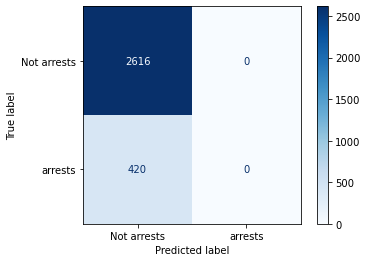

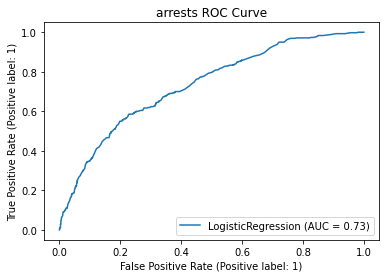

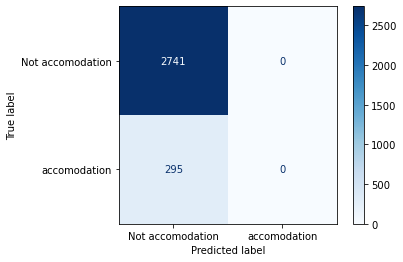

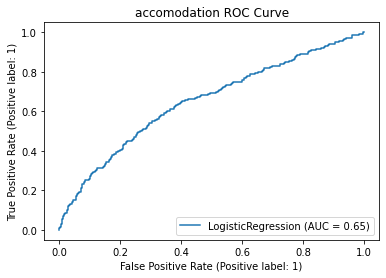

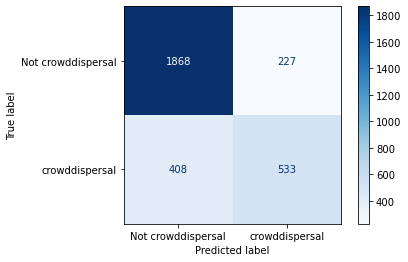

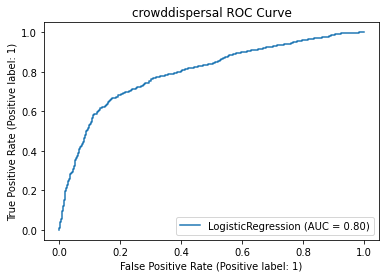

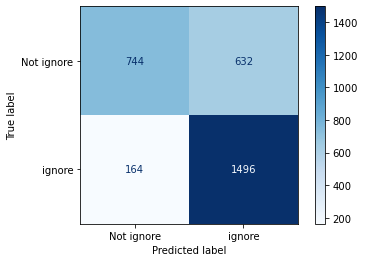

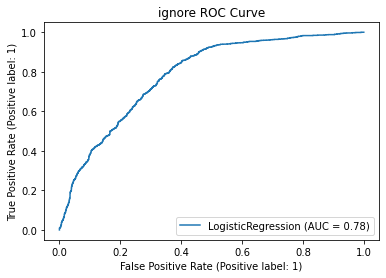

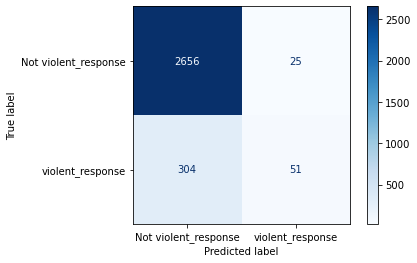

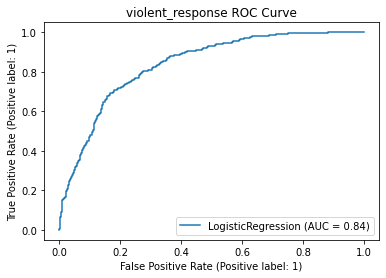

In [24]:
model_performance_dict_nc = {
    'target':[],
    'ROC/AUC':[],
    'f1_score_train':[],
    'f1_score_test':[],
    'precision_train':[],
    'precision_test':[],
    'recall_train':[],
    'recall_test':[],   
}

 
targets = ['arrests','accomodation','crowddispersal','ignore', 'violent_response']  

# all models in list were fit in cells above by running function 
models = [logreg_arr, logreg_acc, logreg_cd, logreg_ig, logreg_vr]

target_model_list = list(zip(targets, models))
    
for target, model in target_model_list:
        
    X_train, roc_auc, f1_score_train, f1_score_test, \
    precision_train, precision_test, recall_train, recall_test, \
    accuracy_train, accuracy_test = state_response_predictor(mass_no_country, 
                                                             features, 
                                                             target, 
                                                             model,
                                                             output_flag=True)

    model_performance_dict_nc['target'].append(target)
    model_performance_dict_nc['ROC/AUC'].append(roc_auc)
    model_performance_dict_nc['f1_score_train'].append(f1_score_train)
    model_performance_dict_nc['f1_score_test'].append(f1_score_test)
    model_performance_dict_nc['precision_train'].append(precision_train)
    model_performance_dict_nc['precision_test'].append(precision_test)
    model_performance_dict_nc['recall_train'].append(recall_train)
    model_performance_dict_nc['recall_test'].append(recall_test)
    
# print(model_performance_dict)
    
model_performance_df_nc = pd.DataFrame(model_performance_dict_nc)
model_performance_df_nc.round(4)

### Pickling models and adding to `models` folder on GitHub

In [ ]:
import pickle

In [ ]:
# arrests model 
model_file = '../models/03a_logistic_regression_arrests.pickle'
pickle.dump(logreg_arr, open(model_file, 'wb'))

In [ ]:
# accomodation model 
model_file = '../models/03b_logistic_regression_accomodation.pickle'
pickle.dump(logreg_acc, open(model_file, 'wb'))

In [ ]:
# crowd dispersal model 
model_file = '../models/03c_logistic_regression_crowddispersal.pickle'
pickle.dump(logreg_cd, open(model_file, 'wb'))

In [ ]:
# ignore model 
model_file = '../models/03d_logistic_regression_ignore.pickle'
pickle.dump(logreg_ig, open(model_file, 'wb'))

In [ ]:
# violent response model 
model_file = '../models/03e_logistic_regression_violent_response.pickle'
pickle.dump(logreg_vr, open(model_file, 'wb'))

In [ ]:
# beatings model 
model_file = '../models/03f_logistic_regression_beatings.pickle'
pickle.dump(logreg_beat, open(model_file, 'wb'))

In [ ]:
# shootings model 
model_file = '../models/03g_logistic_regression_shootings.pickle'
pickle.dump(logreg_shoot, open(model_file, 'wb'))

In [ ]:
# killings model
model_file = '../models/03h_logistic_regression_killings.pickle'
pickle.dump(logreg_kill, open(model_file, 'wb'))